# Credit Default Risk

Este notebook serve para fazer os exercícios do livro Projetos de Ciência de Dados com Python, especificamente do capítulo 1 - Exploração e Limpeza de dados


**O desafio da empresa**

A empresa de cartão de crédito disponibilizou um dataset com dados demográficos e financeiros dos últimos 6 meses de uma amostra de 30.000 titulares de contas. Há uma linha para cada conta e as linhas são rotuladas de acordo com se no mês seguinte ao período de dados histórico de seis meses um proprietário de conta ficou inadimplente, ou seja, não fez o pagamento mínimo

**Objetivo**

Desenvolver um algoritmo que consiga prever se uma conta ficará inadimplente no próximo mês com base no conjunto de dados.




| **Coluna**     | **Descrição**                                                                                                                                       |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **LIMIT_BAL**  | Montante do crédito concedido (em dólar taiwanês): inclui tanto o crédito individual do consumidor quanto o crédito da sua família (suplementar).     |
| **SEX**        | Gênero (1 = masculino; 2 = feminino). **Nota:** Não usarei os dados de gênero para tomar decisões devido a considerações éticas.                     |
| **EDUCATION**  | Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).                                                                        |
| **MARRIAGE**   | Estado civil (1 = casado; 2 = solteiro; 3 = outros).                                                                                                 |
| **AGE**        | Idade (anos).                                                                                                                                        |
| **PAY_1-PAY_6**| Histórico de pagamento passado. Foram rastreados os registros mensais de pagamento passado (de abril a setembro de 2005) da seguinte forma: <br> PAY_1 = status de pagamento em setembro de 2005; <br> PAY_2 = status de pagamento em agosto de 2005; <br> ...; PAY_6 = status de pagamento em abril de 2005. <br> A escala de medição para o status de pagamento é: <br> -1 = pago pontualmente; 1 = atraso de pagamento por um mês; <br> 2 = atraso de pagamento por dois meses; ...; <br> 8 = atraso de pagamento por oito meses; 9 = atraso de pagamento por nove meses ou mais. |
| **BILL_AMT1-BILL_AMT6** | Valor da fatura (em dólar taiwanês). <br> BILL_AMT1 representa o valor da fatura em setembro; <br> BILL_AMT2 representa o valor da fatura em agosto; <br> e assim por diante até BILL_AMT7, que representa o valor pago em abril. |
| **Explicações adicionais das colunas feitas pelo sócio da empresa** | -2: Significa que começou o mês sem valor a ser pago e o crédito não foi usado. <br> -1: Significa que usou um valor que foi totalmente pago. <br> 0: Significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago. |

# 0.0 IMPORTS

In [2]:
# Import Libs
import pandas as pd
import numpy as np

# Display options.
pd.set_option('display.max_columns', None)


# Exercícios - Capítulo 1

## Exercício 1: Examinando o Anaconda e familiarizando-se com o Python



In [3]:
example_dict = {'apples':5, 'oranges':8, 'bananas':13}
dict_to_list = list(example_dict)
dict_to_list = dict_to_list + [('pears')]
sorted(dict_to_list)


['apples', 'bananas', 'oranges', 'pears']

In [4]:
!python -V

Python 3.10.12


## Exercício 2: Carregando os Dados

In [5]:
df = pd.read_excel( 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls' )

In [6]:
df.shape

(30000, 25)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## Exercício 3: Verificando a integridade básica dos dados

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df['ID'].nunique() # detectado um problema de qualidade de dados

29687

In [12]:
# Verificando a frequência dos valores duplicados
id_counts = df['ID'].value_counts()

# ID's duplicados agrupados
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [13]:
# ID's duplicados agrupados
id_counts.value_counts()


count
1    29374
2      313
Name: count, dtype: int64

## Exercício 4: Continuiando a verificação da integridade dos dados

In [14]:
                                              # Máscara booleana para localizar IDs duplicados
mascara_booleana = id_counts == 2
mascara_booleana[0:10]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
2a793ecf-05c6    True
75938fec-e5ec    True
7be61027-a493    True
a3a5c0fc-fdd6    True
b44b81b2-7789    True
Name: count, dtype: bool

In [15]:
ids_duplicados = id_counts.index[mascara_booleana]
ids_duplicados = list(ids_duplicados)
len(ids_duplicados)

313

In [16]:
# visualizando todas as colunas dos três primeiros IDs duplicados
df.loc[df['ID'].isin(ids_duplicados[0:3]),:].head(6)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,0,0,160832,164750,168370,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,0,0,24928,24229,25832,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,0,-1,47974,43680,22133,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Criando máscara booleana para filtrar as linhas zeradas
df_mascara_zero = df == 0
df_mascara_zero.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
22923,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
21514,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
5171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
25027,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
25401,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [18]:
# Identificando linhas em que todos os elementos são 0, a partir da segunda coluna.
rows_all_zeros = df_mascara_zero.iloc[:,1:].all(axis=1)
sum( rows_all_zeros )

315

In [19]:
rows_all_zeros.value_counts()

False    29685
True       315
Name: count, dtype: int64

In [20]:
df_aux = df.loc[~rows_all_zeros, :].value_counts()
df_aux.value_counts()

count
1    29685
Name: count, dtype: int64

In [21]:
# Limpando df
df_clean_1 = df.loc[~rows_all_zeros, :].copy()
df_clean_1.shape

(29685, 25)

In [22]:
df_clean_1['ID'].nunique()

29685

## Exercício 5: Explorando e limpando os dados


In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [24]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

Escala de medida do status de reembolso

-1 = pagamento pontual

1 = atraso de um mês

2 = atraso de dois meses

...

9 = atraso de nove meses


In [25]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [26]:
pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
sum(pay_1_mask) # soma de valores exceto 'Not available'

26664

In [27]:
df_clean_2 = df_clean_1.loc[pay_1_mask, :].copy()
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [28]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype( 'int64' )


In [29]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


O sócio da empresa forneceu a seguinte informação acerca da documentação de PAY_1

-2 = A conta começou o mês sem valor a ser pago e o crédito não foi usado

-1 = A conta usou um valor que foi totalmente pago

0 = O pagamento mínimo foi feito, mas o saldo total devedor não foi pago ( ficando acumulado para o mês seguinte )

Além disso, o gênero não deve ser usado na previsão porque seria antiético.


## Exercício 6: Explorando o limite de crédito e as características demográficas

Utilizaremos histogramas para visualizar dados que estejam em uma escala contínua ( LIMIT_BAL E AGE )

In [30]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

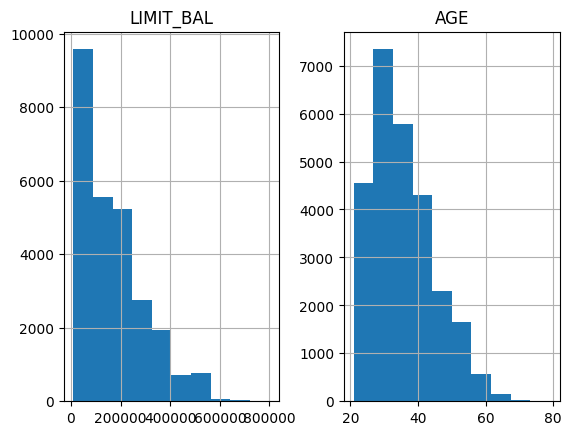

In [31]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [32]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Os valores fazem sentido, lembrando que esse dataset é de Taiwan, ou seja, a unidade monetária está em novos dólares taiwanses.

In [33]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

Aqui existem graus de instrução não documentados: 0, 5 e 6. E como não são predominantes, é adequado agrupá-los na categoria 4 'outros'.

In [34]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)

In [35]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [36]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

Problema parecido com a característica "Education", o valor 0 não está documentado. Logo, vamos agrupá-lo com "outros".

In [37]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)

In [38]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

Verificamos que a substituição deu certo.

## Aprofundamento nas características categóricas

Text(0.5, 0, 'Education level: ordinal encoding')

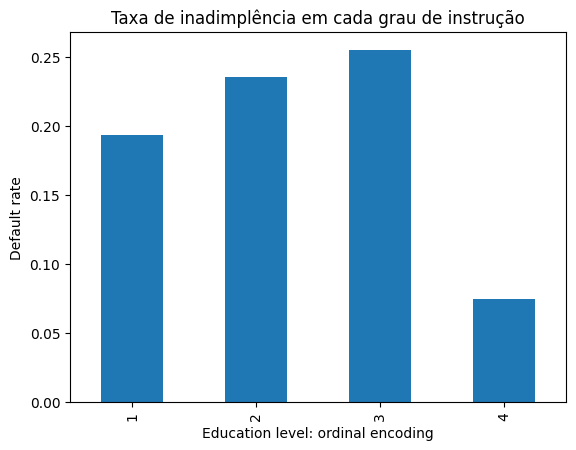

In [39]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.title( 'Taxa de inadimplência em cada grau de instrução')
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Um ajuste de linha reta não explica bem esses dados pois a característica não tem comportamento linear. Portanto, é necessário utilizar um algoritmo mais complexo.

## Exercício 7: Implementando a one-hot-encoding para uma característica categórica.


In [40]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [41]:
# criando um dicionário para o mapeamento das categorias de instrução
cat_mapping = {1: "graduate school", 2: "university", 3: "high school", 4: "others"}

In [42]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [43]:
edu_ohe = pd.get_dummies( df_clean_2['EDUCATION_CAT']).astype('int')
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [44]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [45]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index=False)

## Explorando as características de histórico financeiro do dataset

In [46]:
df = pd.read_csv('chapter_1_cleaned_data.csv')

In [47]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1


In [48]:
df.shape

(26664, 30)

In [49]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [50]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [51]:
# contagem de valores dos status de pagamento
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

A maioria dos valores são -2, -1 ou 0, que correspondem a uma conta que estava regular no mês anterior.

-2 = não usada

-1 = totalmente paga

0 = pagamento mínimo feito ( mas o restante do saldo devedor acumulou para o mês seguinte )

<Axes: >

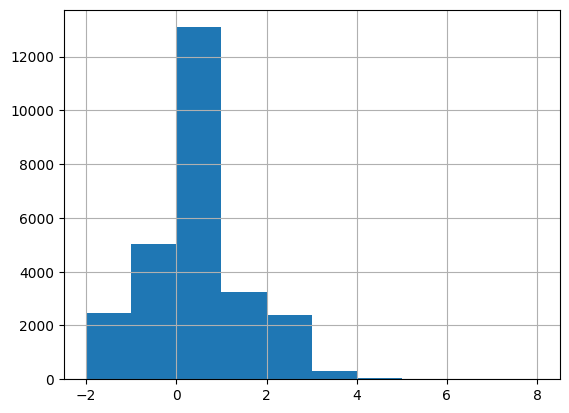

In [52]:
# Histograma de PAY_1
df[pay_feats[0]].hist()


In [53]:
pay_1_bins = np.array( range( -2, 10 ) ) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

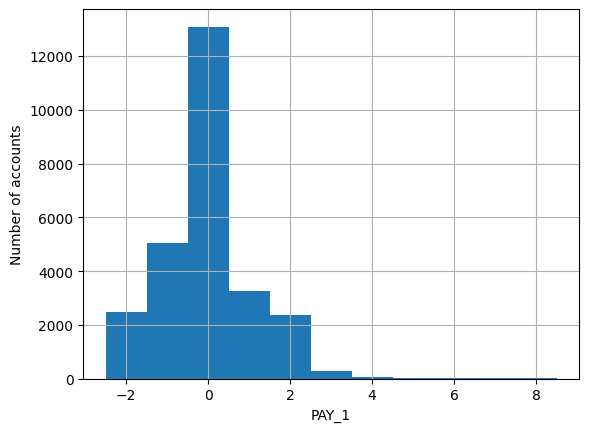

In [54]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel( 'PAY_1' )
plt.ylabel( 'Number of accounts' )

O histograma de PAY_1 confirma que a maioria das contas está em boa situação( valores -2, -1 e 0).

<Axes: xlabel='PAY_1'>

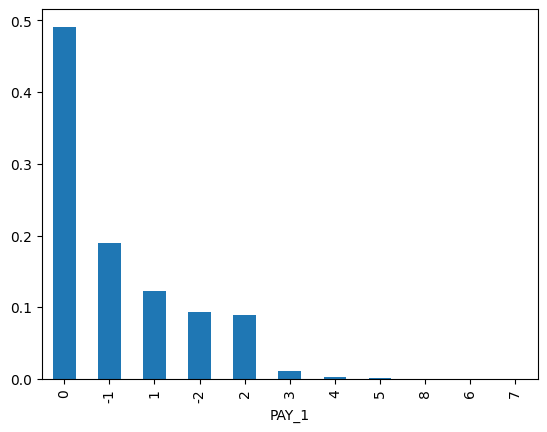

In [55]:
df[pay_feats[0]].value_counts(1).plot.bar()

Nesse gráfico de PAY_1 (setembro) , verificamos que a porcentagem de contas no status 0 é de 49%.

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

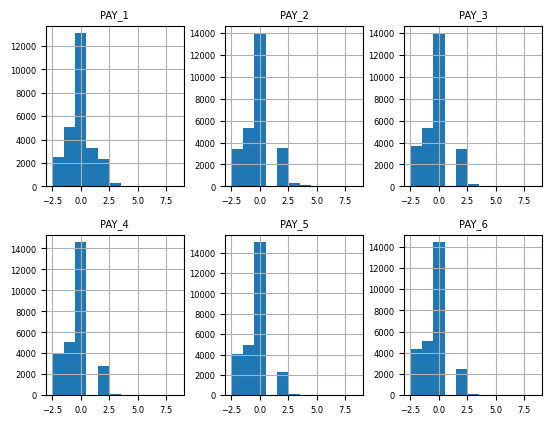

In [56]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 6
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

Relembrando o que cada característica significa:

PAY_1 = status de reembolso em setembro

PAY_2 = status de reembolso em agosto

PAY_3 = status de reembolso em julho

PAY_4 = status de reembolso em junho

PAY_5 = status de reembolso em maio

PAY_6 = status de reembolso em abril

Um valor igual a 1 significa atraso de 1 mês no pagamento, 2 significa atraso de dois meses e assim por diante.

In [57]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Não faz sentido ter atraso de 2 meses no mês de agosto sendo que no mês anterior não teve atraso de 1 mês.

O cliente informou que está tendo problemas para obter dados do último mês e por isso tem gerado dados incorretos para contas com atraso de 1 mês no pagamento. O problema foi resolvido em Setembro (PAY_1). Portanto, somente o mês mais recente dos dados de status de pagamento está correto.

## Atividade 1

In [58]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [59]:
# Síntese estatística do valor de fatura
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

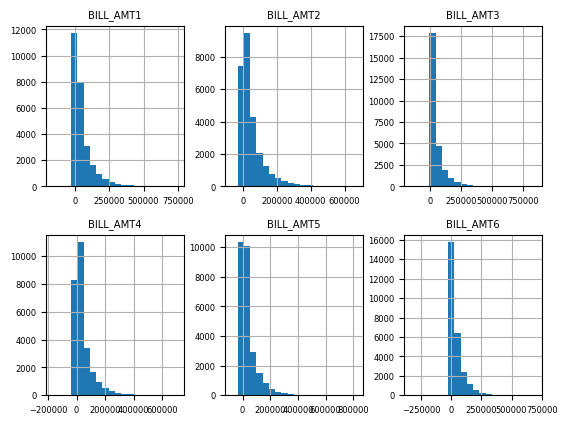

In [60]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 6
df[bill_feats].hist(bins=20, layout=(2,3))

In [61]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

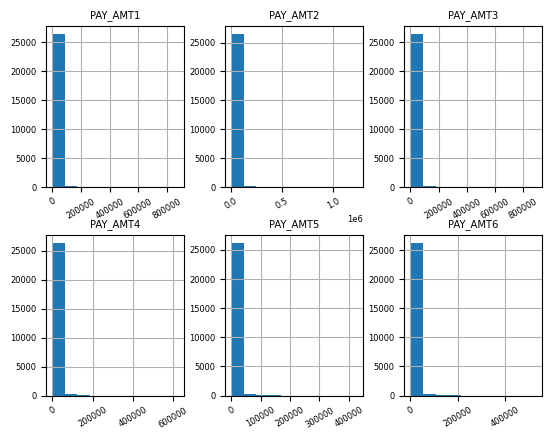

In [62]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

Os valores de pagamentos mensais estão em um bin que inclui 0, mas quantos de fato são iguais a 0?

In [63]:
# Contagens de pagamentos de fatura iguais a 0
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

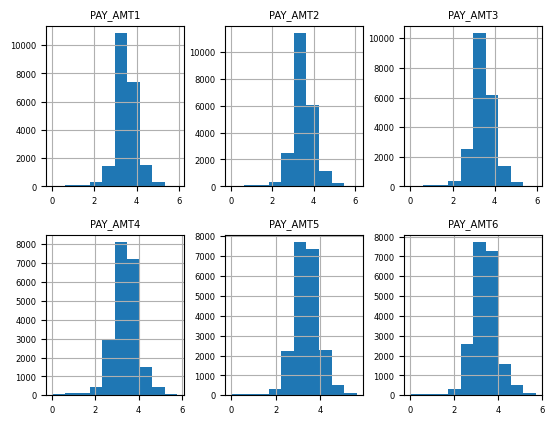

In [64]:
df[pay_amt_feats][~pay_zero_mask].apply( np.log10 ).hist(layout=( 2,3 ) )

Como os bins maiores estavam quase invisíveis por terem poucas contas, foi necessário aplicar uma transformação logarítmica ( log transform ). Filtramos os 0 através de uma máscara porque log10(0) é indefinido e agora podemos ter uma visualização mais informativa nesses histrogramas.

Podemos ver que a maioria dos pagamentos estão no intervalo dos milhares (log10(1.000) = 3)